In [ ]:
# in this venv, we have qiskit, qiskit-aer, and qiskit-ibm-runtime installed

import qiskit
import qiskit_aer
import qiskit_ibm_runtime

# Check the version (optional)
# We will check their versions to confirm the installation
try:
    print(f"Qiskit version installed for this conda env is: {qiskit.__version__}")
    print(f"Qiskit Aer version: {qiskit_aer.__version__}")
    print(f"Qiskit IBM Runtime version: {qiskit_ibm_runtime.__version__}")
except Exception as exc:
    print(f"Version check failed: {exc}")


Qiskit version installed for this conda env is: 2.2.3
Qiskit Aer version: 0.17.2
Qiskit IBM Runtime version: 0.43.1


In [ ]:
# circuit creation and simulation example
import qiskit
import qiskit_aer
import qiskit_ibm_runtime

# create Bell state circuit and simulate with Qiskit Aer
qc = qiskit.QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

sim = qiskit_aer.Aer.get_backend('aer_simulator')
# use backend.run(...) instead of qiskit.execute which may not exist
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print(counts)

# display circuit (optional)
qc.draw(output='text')

{'11': 480, '00': 544}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

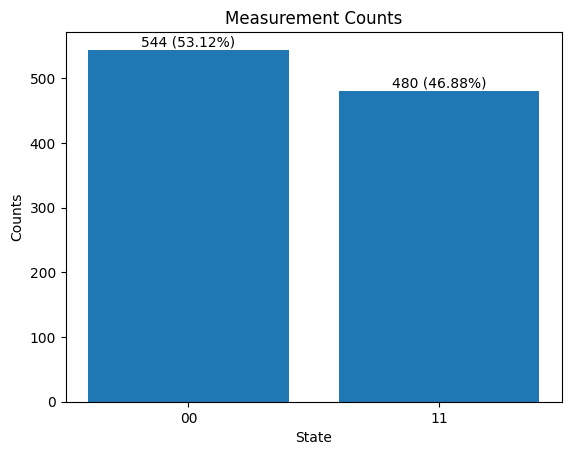

In [ ]:
# visualize the results using matplotlib
import matplotlib.pyplot as plt

# Use existing `counts` variable
labels, values = zip(*sorted(counts.items()))  # sort states for consistent order
total = sum(values)
fig, ax = plt.subplots()
ax.bar(labels, values, color='C0')  ``
ax.set_xlabel('State')
ax.set_ylabel('Counts')
ax.set_title('Measurement Counts')
for i, v in enumerate(values):
    ax.text(i, v + max(values)*0.01, f"{v} ({v/total:.2%})", ha='center')
plt.show()